## <center> Laplace Equation and Random Walk </center>

In this notebook we will try to solve the equation $\nabla ^2 u = 0 $ by using Monte-Carlo methods where $u$ is subjected to a specific boundary conditions. As we know from the properties of the Laplace equation, Value at a particular grid point $u(x_i,y_i)$ can be written as the  average of it's surroundings (see <a href="https://www.compphy.com/laplace-equation/" target="_blank">Laplace Equation by Finite difference </a>). Here  we are going to use Random Walk to calculate the potential at  each lattice points.
<br>
From the finite difference method we get the following solution

\begin{align}
u(x , y) = \frac{1}{4} \big [ u(x+\Delta ,y)+u(x-\Delta ,y)+u(x,y+\Delta ) +u(x,y-\Delta) \big]
\end{align}



If we examine the behavior of the function $u(x,y)$ at points on a grid with
lattice spacing $\Delta$, we may give this equation a probabilistic interpretation. If
we consider a grid of points in the xy-plane with a lattice spacing of $\Delta$, then
the probability of a random walk returning to the point $(x,y)$ from any of its
nearest neighbor sites is 1/4. If we place the boundary on the grid, as shown
in Figure, a random walk will terminate at a boundary point where u has the value
\begin{equation*}
u(x',y') = f(x',y')
\end{equation*}


![Alt](https://github.com/SachinGupta7/IMAGES_and_gifs/blob/master/laplace_potential.jpg?raw=true)


One can then estimate the value of $u(x,y)$  by executing many random walks
which begin at the point $(x,y)$ as the average over all N walks which have
been performed:

\begin{align}
u(x,y) \approx \frac{1}{N} \sum_{i} f(x_i',y_i')
\end{align}


After a large number of such walks have been performed, a good estimate of
$u(x,y)$ will be produced, but the estimate will depend upon both the coarseness of the grid as well as the number of random walks generated.


## <center>  How to write Code </center> 

1. First Create a 2 dimensional Grid and define the potential on the boundary 
2. For each point on the grid, Initiate a random walk 
> Initiating random walk : At each iterative step chose one of the four directions and append the coordinate of the grid point accordingly. If walker touches the boundary, Random walk will be terminated. After that store the value of the potential of that terminated point in an array. It can be visualized as $\rightarrow$

![Alt](https://github.com/comphyorg/laplace_random/blob/master/laplace%20random.gif?raw=true)


3. Perform N random walks and take the average. This will be the value of the potential at that grid point.


<br>
<br>


*Source:Monte-carlo Simulation in Statistical Physics by DAVID P. LANDAU and KURT BINDER*

## <center> Python Code </center>


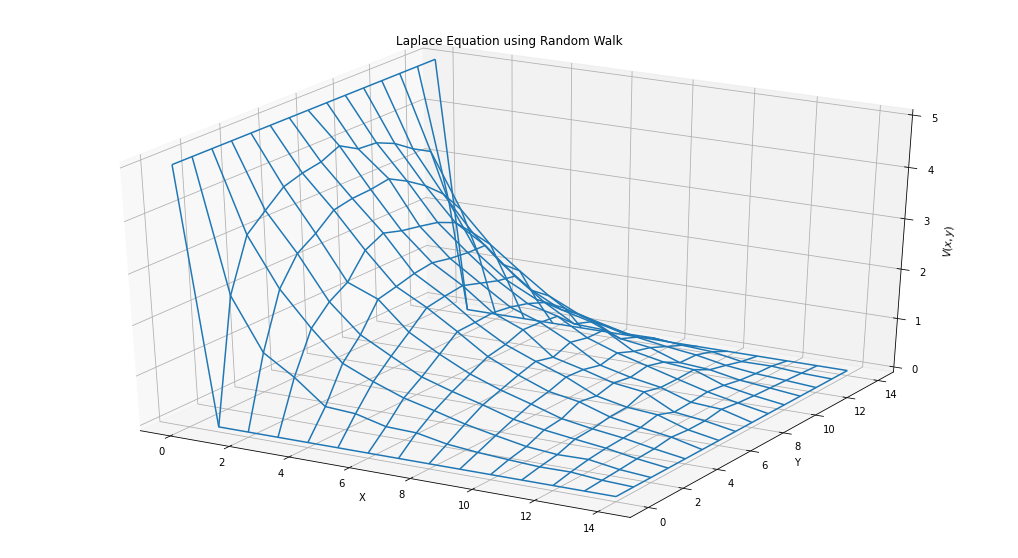

In [134]:
####Importing Libraries
import numpy as np  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

##Defining Grid
Rmax = 15  ##number of rows
Cmax= 15    ##number of columns
V = np.zeros((Rmax,Cmax))  ##taking potental zero at all points excep at one side
V0 = 5
V[0,:] = V0 # SETTING BOUNDARY CONDITIONS i.e. making one side at potential 5 unit

##creating 2d Mesh
X1  = np.arange(0,Rmax,1) 
Y2 = np.arange(0,Cmax,1)
X,Y = np.meshgrid(X1,Y2)

Direction = np.array([(1,0),(-1,0),(0,1),(0,-1)]).reshape(4,2) ## four possible directions of walker

N_iter = 1000 ##number of walks

##looping through all grid points except those at boundaries
for i in range(1,Rmax-1):
    for j in range(1,Cmax-1):
        v_boundary = []  ##this array will store the potential of terminated point
        for k in range(N_iter):  ##performing random walks
            x,y = i,j ##each time we have to begin with i,j
            while True:  ##running infinite loop
                R_n = np.random.randint(0,4)  ##selecting one of four directons
                next_direc = Direction[R_n,:]
                #################3
                ##updating x and y coordinate
                x+= next_direc[0]
                y+= next_direc[1]

                if(x%(Rmax-1)==0 or y%(Cmax-1)==0 ):  ##terminating random walks at boundary 

                    v_boundary.append(V[x,y]) ##appending array
                    break;
        V[i,j] = np.mean(np.array(v_boundary)) ##channging grid potential by an average

#########plotting in 3d
def f():
    z = V[X,Y]  ##giving value to each point of mesh 
    return z;

Z = f() 
### 3d plotting 
fig = plt.figure(figsize = (18,10))  
ax = plt.axes( projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_title('Laplace Equation using Random Walk')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$V(x,y)$')
plt.show()


You can run this code online $\rightarrow$

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1WXJdfLnpG6Oikjr9bashGdFEeu11UqJO#scrollTo=1RtvtIPuHhI9&line=3&uniqifier=1)

## $Voila !!!$